In [1]:
import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# huber1: 閾値以下, huber2: 閾値以下
def huber_loss(y_pred: float, y: float, delta=1.0):
    """HuberLoss"""
    huber_1 = 0.5 * (y - y_pred) ** 2
    huber_2 = delta * (np.abs(y - y_pred) - 0.5 * delta)
    return np.where(np.abs(y - y_pred) <= delta, huber_1, huber_2)

In [3]:
delta = 1.5
x_vals = np.arange(-2, 2, 0.01)
y_vals = np.where(
    np.abs(x_vals) <= delta,
    0.5 * np.square(x_vals),
    delta * (np.abs(x_vals) - 0.5 * delta),
)

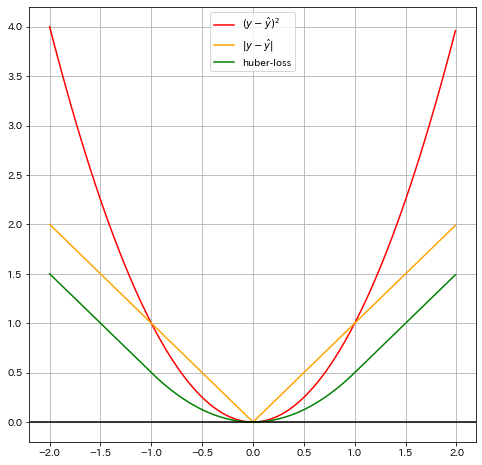

In [4]:
# グラフをプロットする
fig = plt.figure(figsize=(8, 8))
plt.plot(x_vals, x_vals ** 2, "red", label=r"$(y-\hat{y})^2$")  ## 二乗誤差
plt.plot(x_vals, np.abs(x_vals), "orange", label=r"$|y-\hat{y}|$")  ## 絶対誤差
plt.plot(
    x_vals, huber_loss(x_vals * 2, x_vals), "green", label=r"huber-loss"
)  # Huber-loss
plt.axhline(y=0, color="k")
plt.grid(True)
plt.legend()
plt.show()

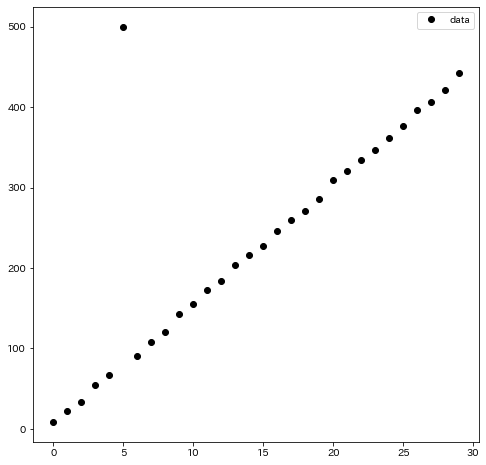

In [5]:
N = 30
x1 = np.array([i for i in range(N)])
x2 = np.array([i for i in range(N)])
X = np.array([x1, x2]).T
epsilon = np.array([np.random.random() for i in range(N)])
y = 5 * x1 + 10 * x2 + epsilon * 10
y[5] = 500

plt.figure(figsize=(8, 8))
plt.plot(x1, y, "ko", label="data")
plt.legend()
plt.show()

In [7]:
from sklearn.datasets import make_regression
from sklearn.linear_model import HuberRegressor, LinearRegression, Ridge

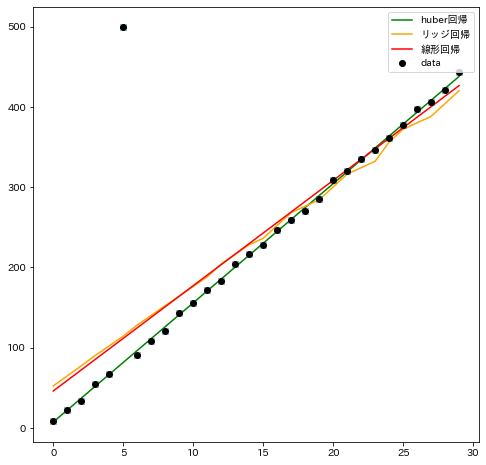

In [8]:

plt.figure(figsize=(8, 8))
huber = HuberRegressor(alpha=0.0, epsilon=3)
huber.fit(X, y)
plt.plot(x1, huber.predict(X), "green", label="huber回帰")

ridge = Ridge(alpha=0.0, random_state=0)
ridge.fit(X, y)
plt.plot(x1, ridge.predict(X), "orange", label="リッジ回帰")

lr = LinearRegression()
lr.fit(X, y)
plt.plot(x1, lr.predict(X), "r-", label="線形回帰")
plt.plot(x1, y, "x")

plt.plot(x1, y, "ko", label="data")
plt.legend()
plt.show()